In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os

from pandas import json_normalize
import time
import sqlite3
import sqlalchemy
#import modin.pandas as pd
#import swifter
from datetime import datetime, timedelta

In [6]:
import geopandas as gpd
#import basemap
%matplotlib inline

In [7]:
list3=[i for i in range(0,720)]


In [8]:

pickle_data = [f'lastbatch{i}' for i in list3]
data = pd.concat([pd.read_pickle(files) for files in pickle_data])

In [52]:
data.id_str.nunique()

13857163

In [11]:

raj=data['timestamp_ms']

In [12]:
raj=raj.astype('int64')

In [13]:
raj=pd.to_datetime(raj,unit='ms')

In [14]:
raj=raj+timedelta(hours=1)

In [15]:
data=data.assign(time=raj)

In [ ]:
data.tail()

In [11]:
data['id_str'].nunique()

13857163

In [17]:
data['normalised_date'] = data['time'].dt.normalize()

In [21]:
a=data.groupby(['normalised_date','place.country_code']).size().sort_values(ascending=False)
a.head()

normalised_date  place.country_code
2021-06-18       GB                    154524
2021-06-29       GB                    154521
2021-06-28       GB                    137909
2021-06-12       GB                    137769
2021-06-13       GB                    137156
dtype: int64

In [22]:
b=data.groupby('normalised_date').count()
data["Day"]="WEEKEND"
#print(b.index)
data.Day=np.where(data['normalised_date'].dt.dayofweek>4, "Weekday", "Weekend")

In [15]:
print(b)

                 id_str  user.id_str  in_reply_to_user_id_str  timestamp_ms  \
normalised_date                                                               
2021-06-01       442072       442072                   233141        442100   
2021-06-02       443018       443018                   237794        443032   
2021-06-03       431794       431794                   229372        431810   
2021-06-04       440695       440695                   235886        440722   
2021-06-05       434160       434160                   230115        434190   
2021-06-06       454710       454710                   240919        454757   
2021-06-07       426131       426131                   225894        426151   
2021-06-08       439987       439987                   232570        440010   
2021-06-09       444927       444927                   239178        444942   
2021-06-10       443961       443961                   238508        443980   
2021-06-11       484653       484653                

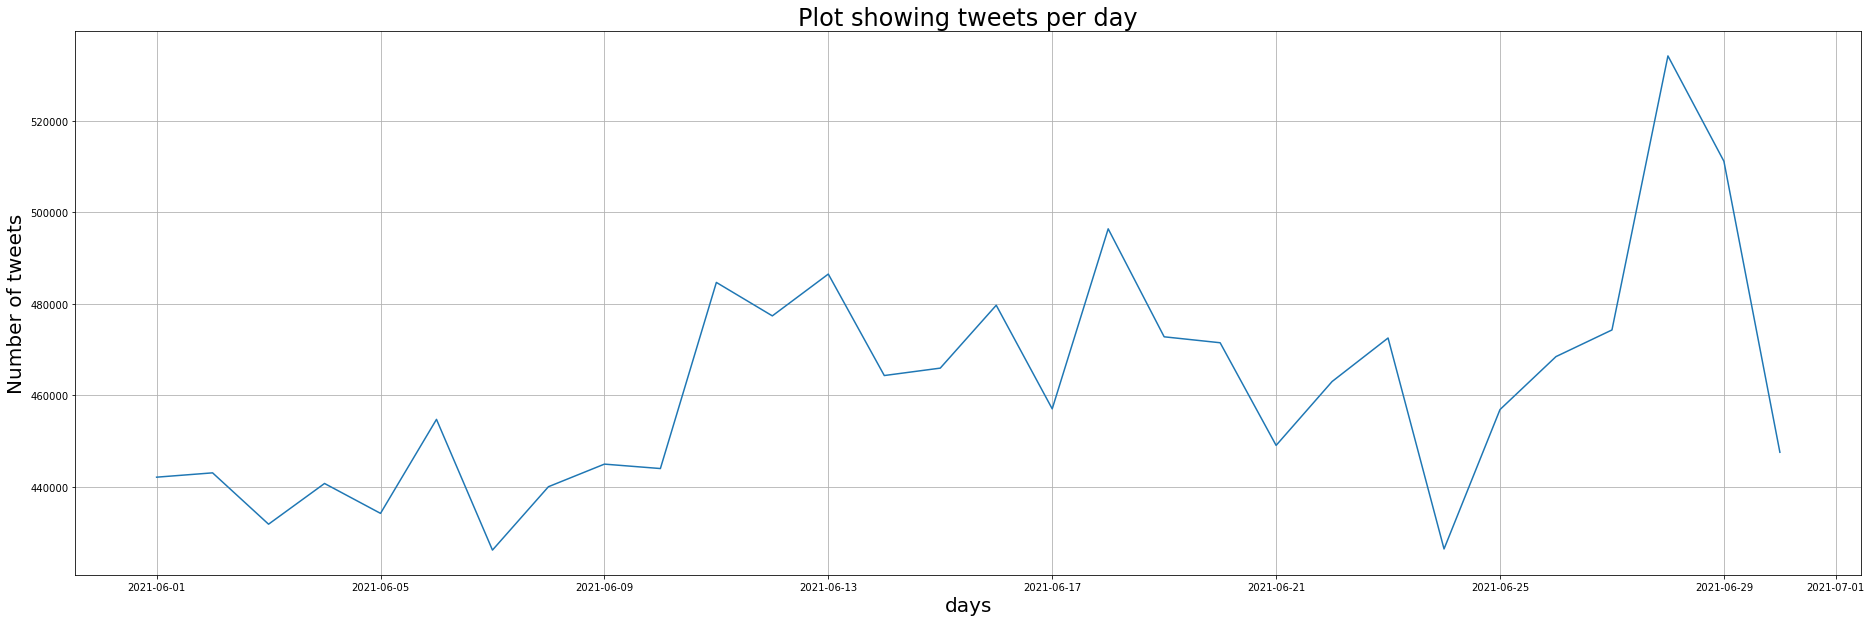

In [14]:
fig, ax = plt.subplots(figsize=(32, 10))
ax.plot(b.index, b.id_str, color='tab:blue')
ax.set_xlabel("days",fontsize=20)
ax.set_ylabel("Number of tweets",fontsize=20)
ax.set_title('Plot showing tweets per day',fontsize=24)
ax.grid(True)

In [39]:
#Question 1.3
BO=data.groupby(['normalised_date']).size()
type(BO)
#lal=BO.values.tolist()
chi=pd.DataFrame(BO)
chi['day']=np.where(chi.index.dayofweek>4, "Weekend", "Weekday")
chi1=chi.rename(columns={0:'tweet'})
chi1

,tweet,day
normalised_date,,
2021-06-01,442100,Weekday
2021-06-02,443032,Weekday
2021-06-03,431810,Weekday
2021-06-04,440722,Weekday
2021-06-05,434190,Weekend
2021-06-06,454757,Weekend
2021-06-07,426151,Weekday
2021-06-08,440010,Weekday
2021-06-09,444942,Weekday


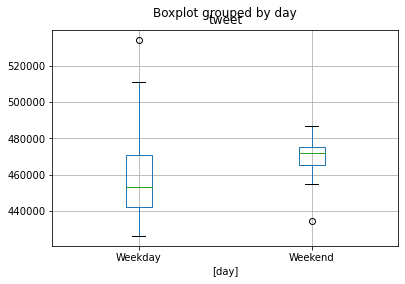

In [40]:
boxplot = chi1.boxplot(column=['tweet'], by=['day'])

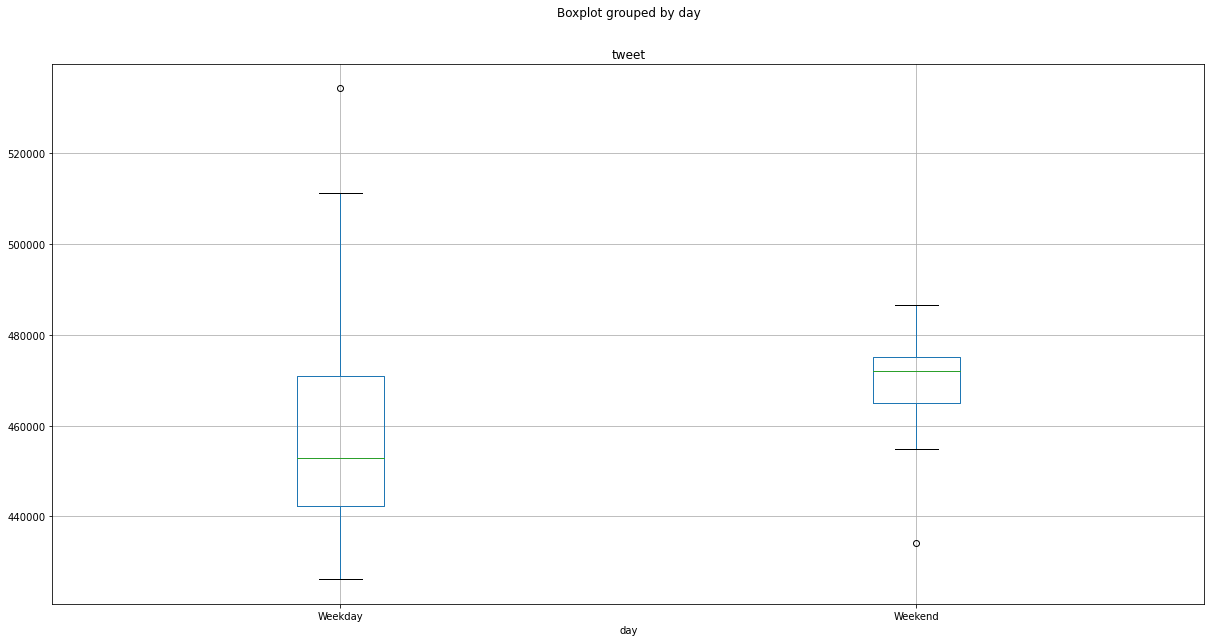

In [43]:
boxplot = chi1.boxplot(column=['tweet'], by='day',figsize=(20,10))

In [12]:
data['hour'] = data['time'].dt.hour

In [13]:
data["DAY"]=np.where(data['normalised_date'].dt.dayofweek>4, "Weekend", "Weekday")

In [14]:
data["dayofweek"]=data['normalised_date'].dt.dayofweek

In [15]:
data.head()

,id_str,user.id_str,in_reply_to_user_id_str,timestamp_ms,coordinates.coordinates,place.bounding_box.coordinates,place.country_code,entities.user_mentions,entities.hashtags,text,created_at,user.followers_count,user.friends_count,time,normalised_date,hour,DAY,dayofweek
0,1399500939766210560,1092190045,None,1622502000167,"[13.435, 52.481388]",NaN,NaN,[],[],klingel,Mon May 31 23:00:00 +0000 2021,1847.0,24.0,2021-06-01 00:00:00.167,2021-06-01,0,Weekday,1
1,1399500940110094340,1199787888,1186645124,1622502000249,NaN,"[[[37.783664, 55.86442], [37.783664, 55.961334...",RU,"[{'id': 1186645124, 'name': '**Helena**', 'scr...",[],@HelenaBrts @Sibirskykot @Chadaew Описание сос...,Mon May 31 23:00:00 +0000 2021,449.0,340.0,2021-06-01 00:00:00.249,2021-06-01,0,Weekday,1
2,1399500942043660290,398768344,None,1622502000710,NaN,"[[[-4.393285, 55.796184], [-4.393285, 55.92042...",GB,[],[],po no que un pavo de 51 años me estaba tirando...,Mon May 31 23:00:00 +0000 2021,1957.0,360.0,2021-06-01 00:00:00.710,2021-06-01,0,Weekday,1
3,1399500944417640451,747259495,None,1622502001276,NaN,"[[[27.257312, 38.308203], [27.257312, 38.56567...",TR,[],[],Hayırlısı ya,Mon May 31 23:00:01 +0000 2021,410.0,134.0,2021-06-01 00:00:01.276,2021-06-01,0,Weekday,1
4,1399500944472166412,2858863684,None,1622502001289,"[8.98777778, 44.4975]","[[[8.916666, 44.450843], [8.916666, 44.507773]...",IT,[],[],"01:00\nTemp. 13,5°C App. 12,9°C\nUmid. 77% \nP...",Mon May 31 23:00:01 +0000 2021,592.0,276.0,2021-06-01 00:00:01.289,2021-06-01,0,Weekday,1


In [25]:
#nun=data.groupby(['DAY','hour','dayofweek']).size()
nun
#nun.index[3][2]
nun1=pd.DataFrame(nun)

In [38]:
nun1.tail(50)

0
DAY     hour dayofweek        
Weekday 23   3           63592
             4           68138
Weekend 0    5           37680
             6           38766
        1    5           21144
             6           22128
        2    5           13364
             6           14176
        3    5           10557
             6           11053
        4    5           12655
             6           12719
        5    5           20749
             6           17691
        6    5           38536
             6           31776
        7    5           62347
             6           54585
        8    5           84187
             6           77699
        9    5           95903
             6           95391
        10   5           97384
             6          100642
        11   5           97308
             6          102837
        12   5           97327
             6          103794
        13   5           97254
             6          100433
        14   5           99548
             6          101837
        15   5           97837
             6          107038
        16   5           98120
             6          102277
        17   5          114288
             6          116646
        18   5          134653
             6          127472
        19   5          116645
             6          125108
        20   5          120111
             6          131316
        21   5          119210
             6          131593
        22   5          100252
             6          100353
        23   5           65704
             6           59698

In [30]:
run=nun1.groupby(['DAY','hour']).mean()

In [31]:
run

0
DAY     hour          
Weekday 0      35082.0
        1      18657.6
        2      11953.0
        3      10897.6
        4      15441.2
        5      29306.6
        6      54933.0
        7      78162.6
        8      92158.8
        9      95821.8
        10     97548.6
        11     98645.2
        12    101897.2
        13    100737.0
        14     99622.0
        15     98946.6
        16    105324.4
        17    118670.4
        18    131126.4
        19    136108.4
        20    146601.2
        21    153515.2
        22    121745.4
        23     71422.0
Weekend 0      38223.0
        1      21636.0
        2      13770.0
        3      10805.0
        4      12687.0
        5      19220.0
        6      35156.0
        7      58466.0
        8      80943.0
        9      95647.0
        10     99013.0
        11    100072.5
        12    100560.5
        13     98843.5
        14    100692.5
        15    102437.5
        16    100198.5
        17    115467.0
        18    131062.5
        19    120876.5
        20    125713.5
        21    125401.5
        22    100302.5
        23     62701.0

In [25]:
hr=data.groupby(['DAY','hour']).count()
hr

id_str  user.id_str  in_reply_to_user_id_str  timestamp_ms  \
DAY     hour                                                               
Weekday 0     175410       175410                    85493        175410   
        1      93288        93288                    42003         93288   
        2      59765        59765                    25581         59765   
        3      54488        54488                    23504         54488   
        4      77206        77206                    37974         77206   
        5     146533       146533                    79369        146533   
        6     274665       274665                   153433        274665   
        7     390813       390813                   219109        390813   
        8     460781       460781                   253777        460794   
        9     479109       479109                   259572        479109   
        10    487736       487736                   256946        487743   
        11    493209       493209                   258616        493226   
        12    509464       509464                   266341        509486   
        13    503658       503658                   268417        503685   
        14    498079       498079                   264067        498110   
        15    494721       494721                   262099        494733   
        16    526576       526576                   276348        526622   
        17    593314       593314                   304655        593352   
        18    655528       655528                   331758        655632   
        19    680486       680486                   355835        680542   
        20    732970       732970                   389013        733006   
        21    767536       767536                   393721        767576   
        22    608636       608636                   321611        608727   
        23    357104       357104                   188316        357110   
Weekend 0      76433        76433                    38573         76446   
        1      43272        43272                    20758         43272   
        2      27540        27540                    12460         27540   
        3      21610        21610                     9000         21610   
        4      25374        25374                    12199         25374   
        5      38440        38440                    20342         38440   
        6      70312        70312                    39262         70312   
        7     116932       116932                    65386        116932   
        8     161886       161886                    91293        161886   
        9     191294       191294                   106735        191294   
        10    198022       198022                   107510        198026   
        11    200142       200142                   106641        200145   
        12    201113       201113                   105894        201121   
        13    197684       197684                   103437        197687   
        14    201361       201361                   102779        201385   
        15    204875       204875                   103128        204875   
        16    200381       200381                   104043        200397   
        17    230901       230901                   113563        230934   
        18    262105       262105                   129223        262125   
        19    241735       241735                   129024        241753   
        20    251409       251409                   134351        251427   
        21    250793       250793                   131391        250803   
        22    200595       200595                   107896        200605   
        23    125402       125402                    66838        125402   

              coordinates.coordinates  place.bounding_box.coordinates  \
DAY     hour                                                            
Weekday 0                        8122                          1752

In [32]:
lis1=[]
lis2=[]
lis3=[]
for i in range(24):
    
    lis1.append(run.index[i][1])
    lis2.append(run[0][i])
print(lis2)   
for i in range(24,48):
    lis3.append(run[0][i])
print(lis3)

[35082.0, 18657.6, 11953.0, 10897.6, 15441.2, 29306.6, 54933.0, 78162.6, 92158.8, 95821.8, 97548.6, 98645.2, 101897.2, 100737.0, 99622.0, 98946.6, 105324.4, 118670.4, 131126.4, 136108.4, 146601.2, 153515.2, 121745.4, 71422.0]
[38223.0, 21636.0, 13770.0, 10805.0, 12687.0, 19220.0, 35156.0, 58466.0, 80943.0, 95647.0, 99013.0, 100072.5, 100560.5, 98843.5, 100692.5, 102437.5, 100198.5, 115467.0, 131062.5, 120876.5, 125713.5, 125401.5, 100302.5, 62701.0]


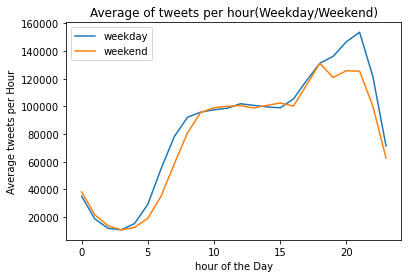

In [47]:
plt.plot(lis1,lis2,label='weekday')
plt.plot(lis1,lis3,label='weekend')
plt.legend()
plt.xlabel('hour of the Day')
plt.ylabel('Average tweets per Hour')
plt.title('Average of tweets per hour(Weekday/Weekend)')
plt.show()

In [4]:
data_user=data['user.id_str']


In [5]:
data_user
data_user.dropna()
fgh=data_user.groupby(data_user.values).size()

In [6]:
val=[]
for i in range(740650):
    val.append(fgh[i])

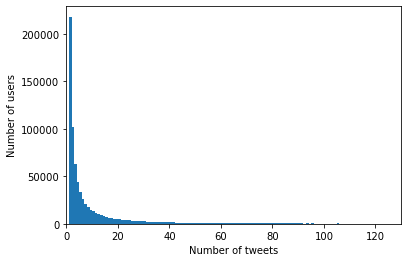

In [7]:
plt.hist(val,range(740650))
plt.xlabel('Number of tweets')
plt.ylabel('Number of users')
plt.xlim(0,130)
plt.show()

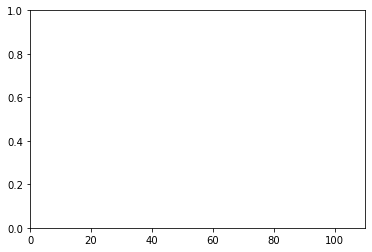

In [9]:
plt.xlim(0,110)
plt.show()

In [9]:
rrr=data_user.groupby(data_user.values).size().sort_values(ascending=False)

In [4]:
usermentions=data['entities.user_mentions']

In [11]:
usermentions.dropna()

0                                                       []
1        [{'id': 1186645124, 'name': '**Helena**', 'scr...
2                                                       []
3                                                       []
4                                                       []
                               ...                        
16364                                                   []
16365                                                   []
16366                                                   []
16367    [{'id': 2845164707, 'name': 'Maciek', 'screen_...
16368    [{'id': 1410008626002022403, 'name': 'Su', 'sc...
Name: entities.user_mentions, Length: 13860686, dtype: object

In [ ]:
raja=pd.DataFrame()
raja['mentions']=usermentions.str.get(['')

In [ ]:
#usermentions.apply(pd.Series)

In [5]:
import advertools as adv

In [13]:
data.text=data.text.astype('str')
mention_summary = adv.extract_mentions(data['text'])
mention_summary.keys()


dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [14]:
mention_summary['top_mentions'][:10]

[('@youtube', 17571),
 ('@rterdogan', 13142),
 ('@borisjohnson', 12809),
 ('@dimash_official', 12709),
 ('@bts_twt', 12654),
 ('@mtv', 12520),
 ('@sedat_peker', 12207),
 ('@gbnews', 11279),
 ('@matthancock', 7604),
 ('@england', 7466)]

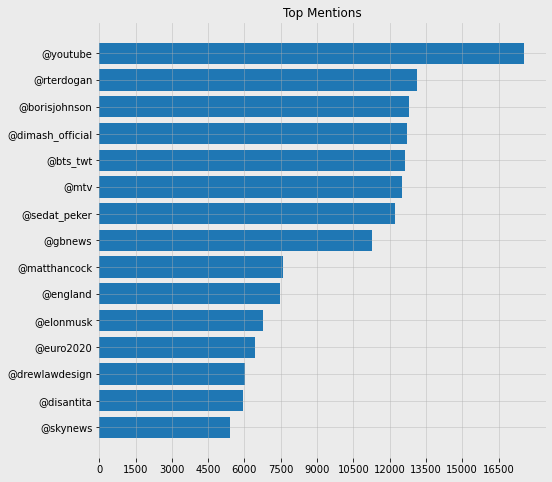

In [34]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=.5)
plt.xticks(range(0, 18000, 1500))
plt.gca().set_frame_on(False)

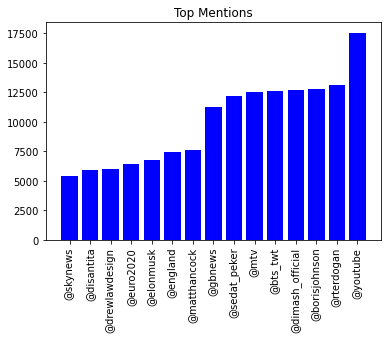

In [56]:
plt.bar([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1],color='blue')
plt.title('Top Mentions')
plt.xticks(rotation=90)
plt.show()

In [58]:
men=mention_summary['mentions_flat']

In [59]:
type(men)

list

In [39]:

data1=data['coordinates.coordinates']
data2=data1.dropna()
#data2.values
long=[]
lat=[]
for i in data2.values:
    long.append(i[0])
    lat.append(i[1])

In [40]:
data11=pd.DataFrame()
data11['long']=long
data11['lat']=lat

In [66]:
import folium
m = folium.Map(
    location=[-24.5, 34.8],
    tiles="cartodbpositron"
)
m

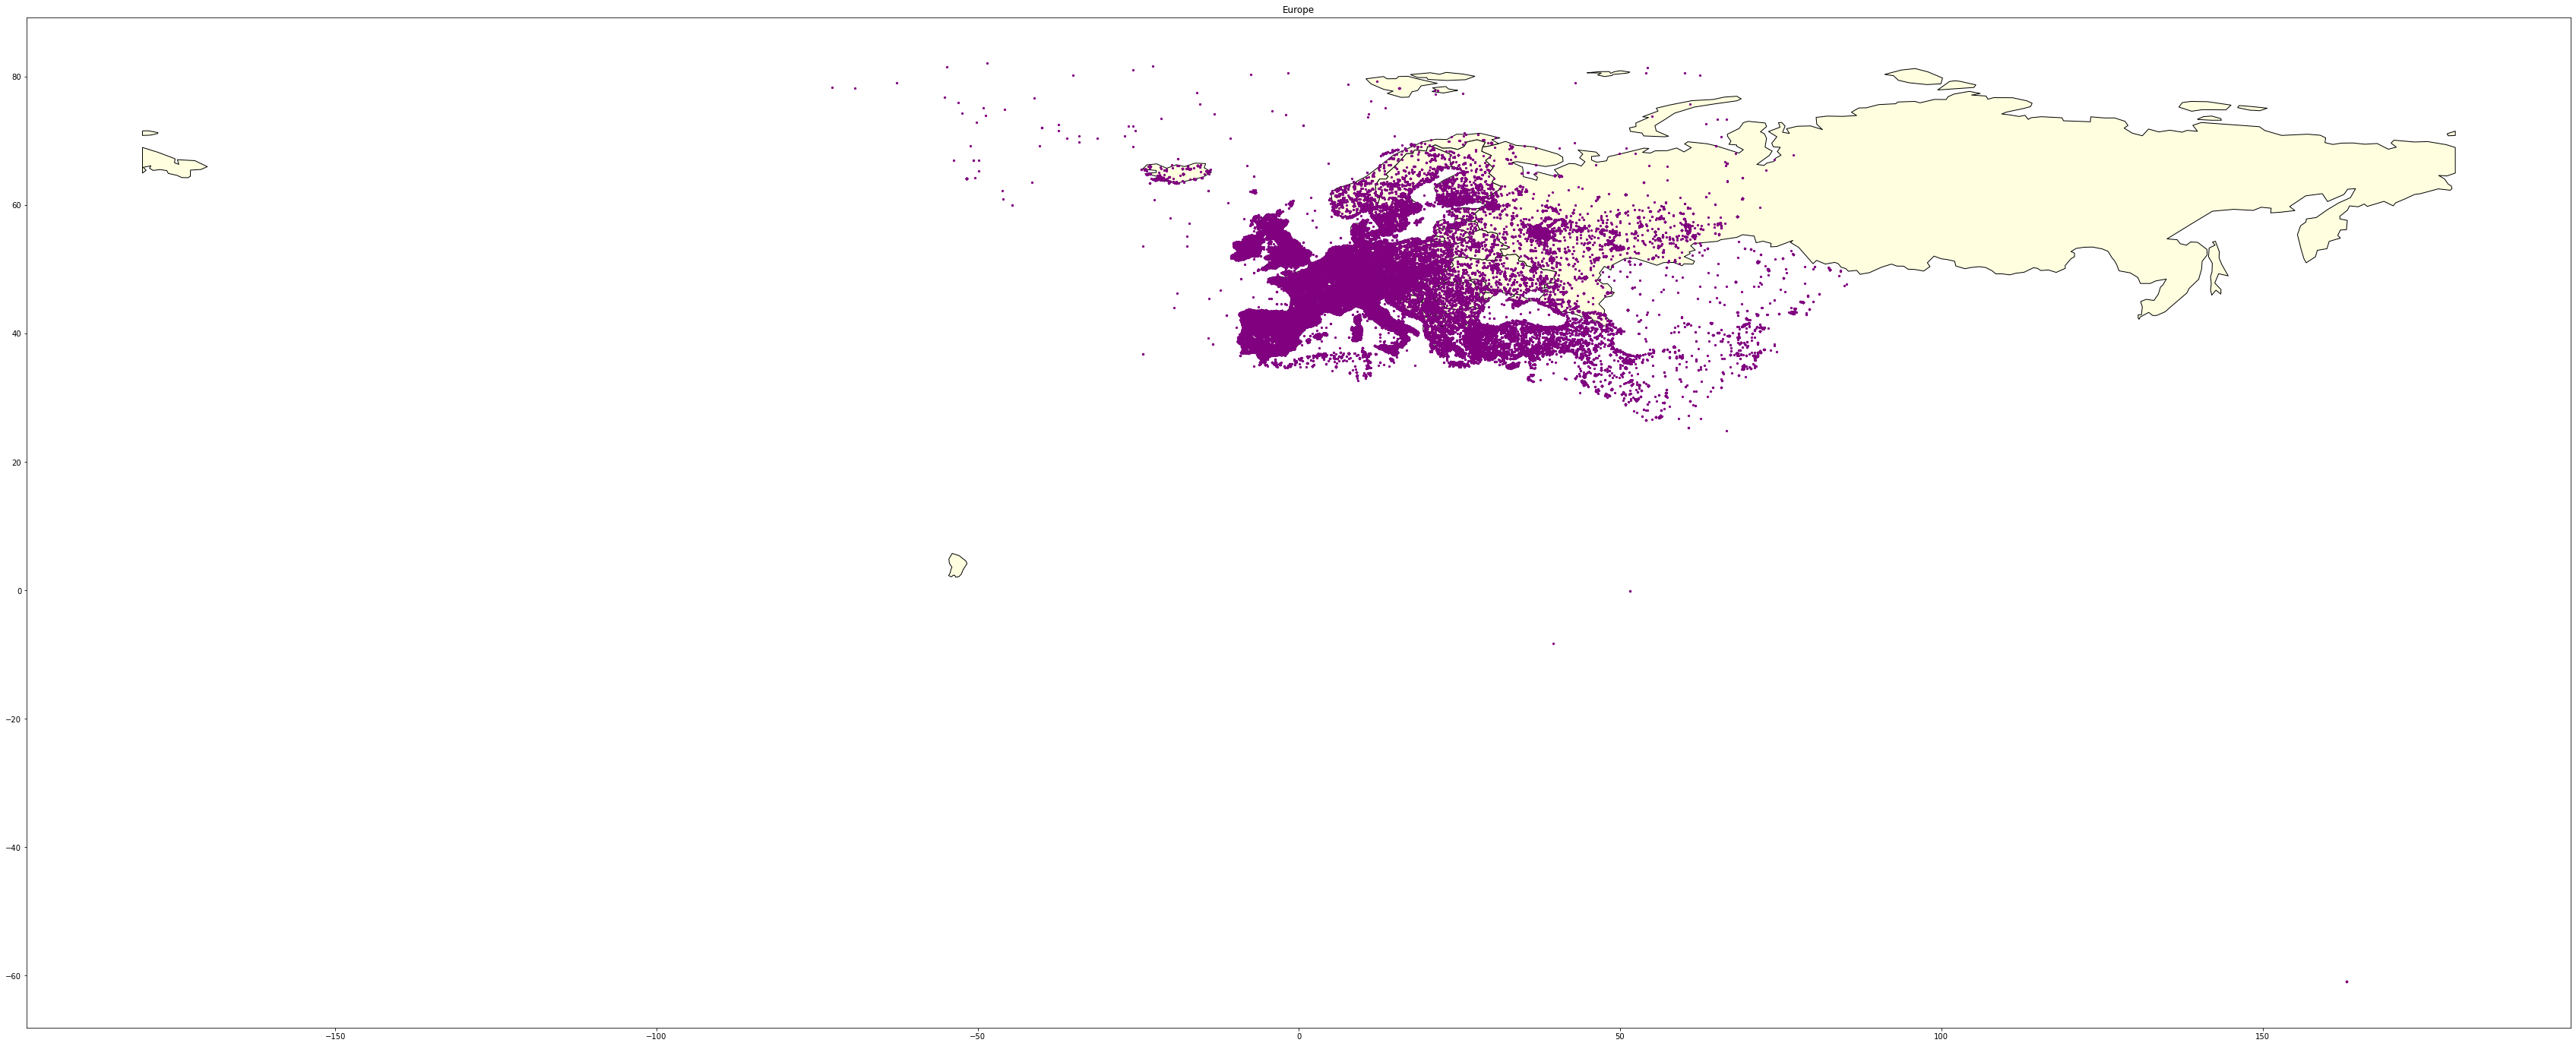

In [50]:
geo=gpd.GeoDataFrame(data11,geometry=gpd.points_from_xy(data11.long,data11.lat))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#geo_merge=world.merge(Europe,on='NAME')
axis=world[world.continent=='Europe'].plot(color='lightyellow', edgecolor='black',figsize=(60,60))
geo.plot(ax=axis, marker='o', color='purple', markersize=5)
plt.title('Europe')
plt.show()

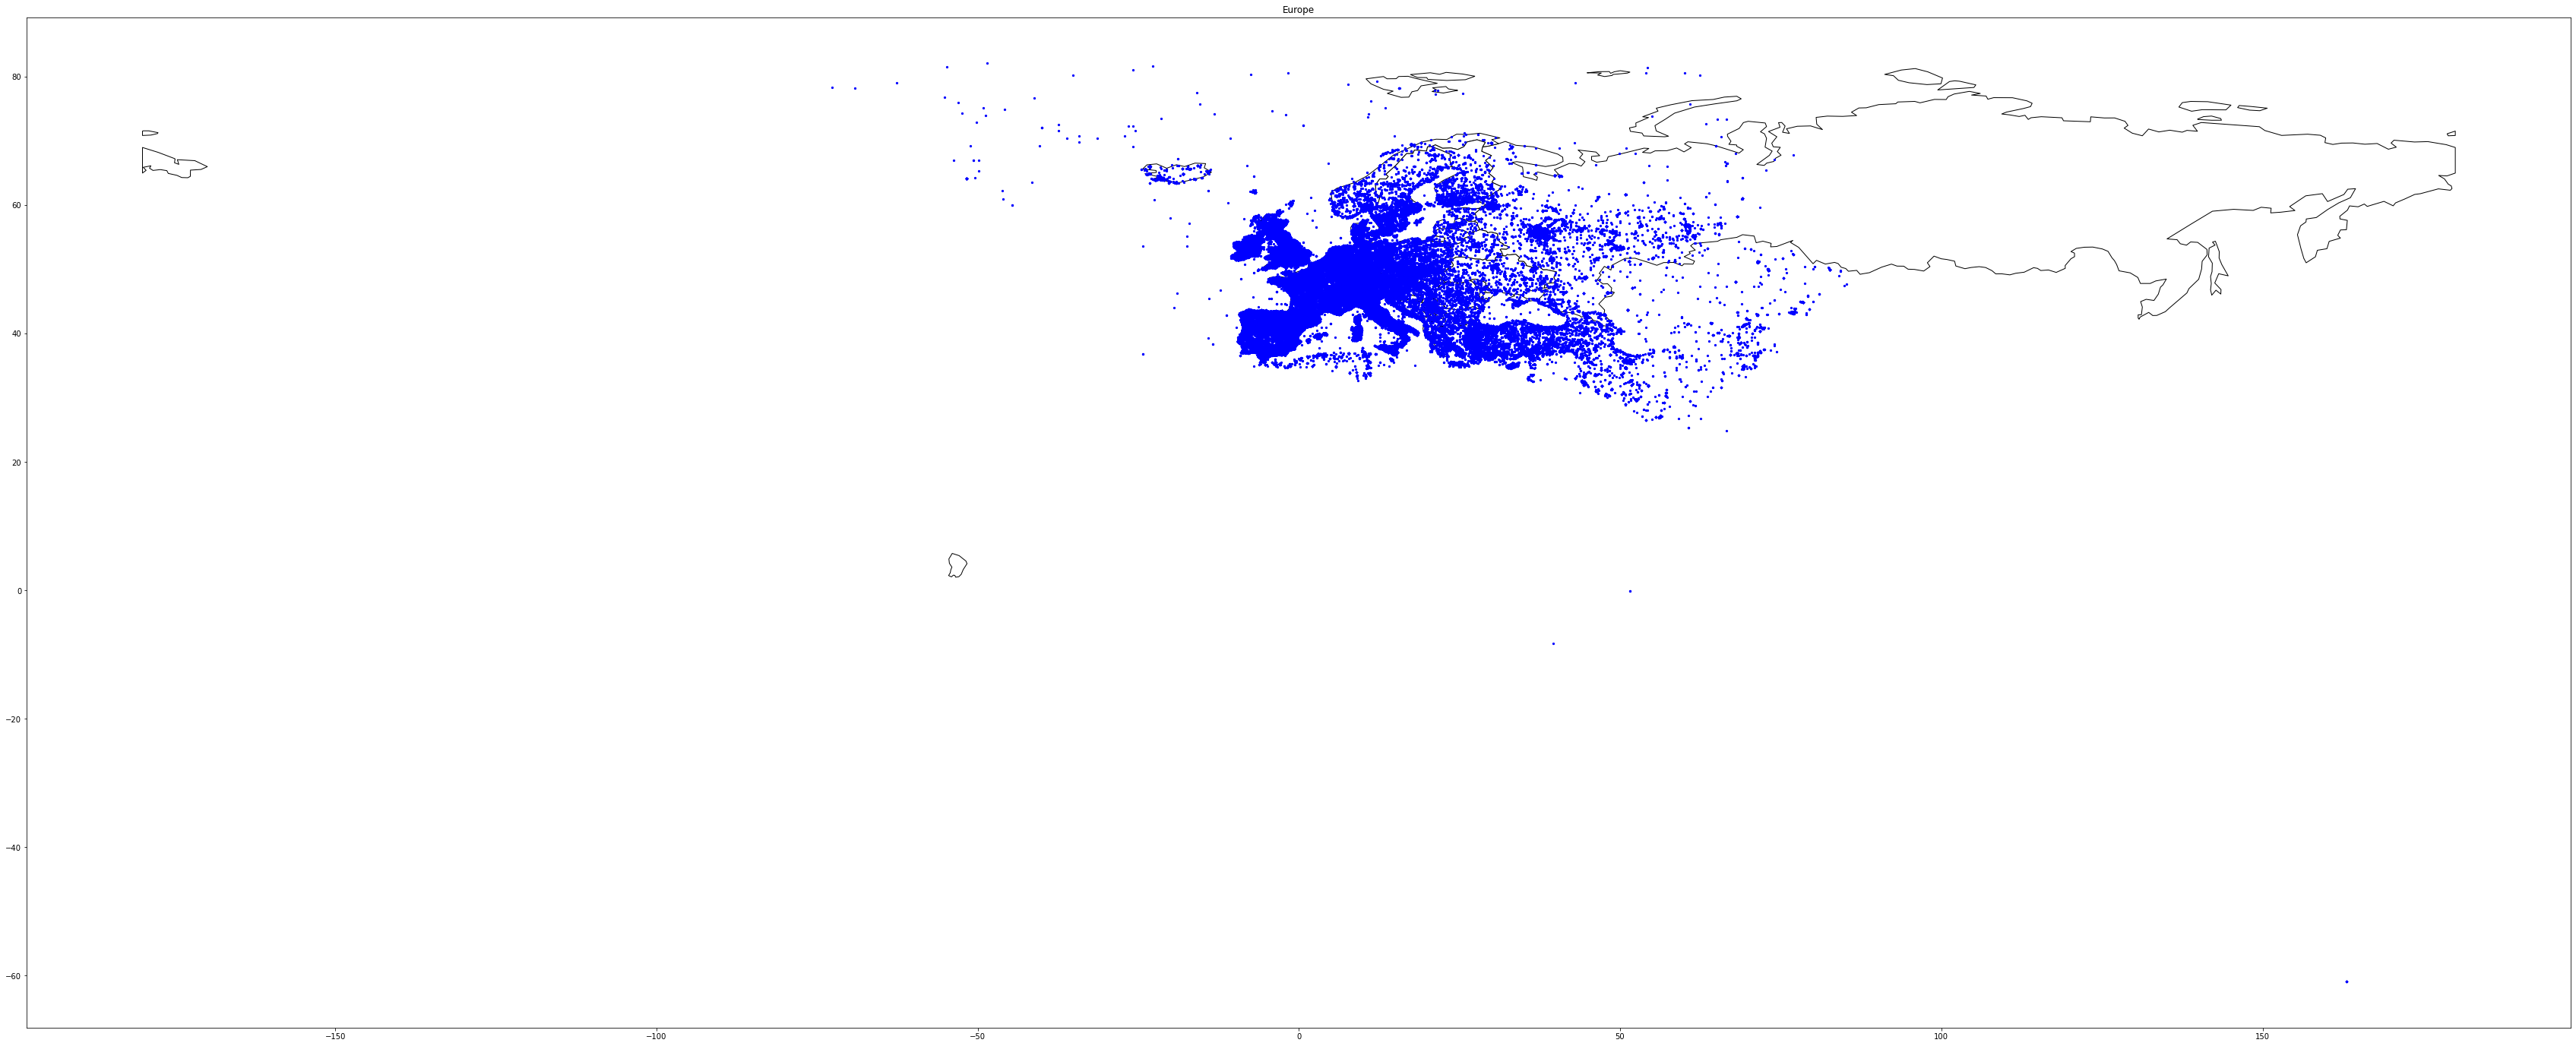

In [8]:
geo=gp.GeoDataFrame(data5,geometry=gp.points_from_xy(data5.long,data5.lat))
world = gp.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axes=world[world.continent=='Europe'].plot(color='white', edgecolor='black',figsize=(60,60))
geo.plot(ax=axes, marker='o', color='cyan', markersize=4)
plt.title('Europe')
plt.show()

In [ ]:
m = Basemap(llcrnrlon=-115,llcrnrlat=5,urcrnrlon=-80,urcrnrlat=35,
            resolution='i',projection='tmerc',lon_0=-99,lat_0=19)
m

In [37]:
data1=data[data['normalised_date']=='2021-06-20']
data_gb=data1[data1['place.country_code']=='TR']

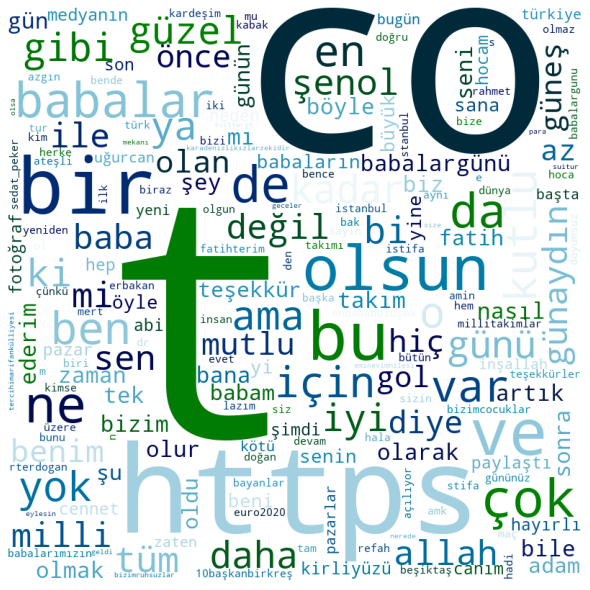

In [38]:



from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
new_words =open('raj.txt').read()
new_stopwords=stopwords.union(new_words)


for val in data_gb.text:
    
    
    val = str(val)

    
    tokens = val.split()
    
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap='ocean',
                normalize_plurals= True,
                collocations=False,
                min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



In [ ]:
'RGBA' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'